# NHIS - Data explore

**Goals** 
* Understand the NHIS dataset fields, focused on neurodiversity related felds
* Come up with scripts to transform and impute values prior to further exploration or prediction
* Run simple correlation & regression analysis


**Notable assumptions being made**
* Sample data from has similar distribution as general US population (e.g. income class, region)

## Results/insights summary

* Few transformations done/proposed prior to further analysis
* There are rotating questions that only happens once every few years
* ASD, ADHD question is not being asked in adults dataset

## Imports and initializations

In [333]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats
import statsmodels.api as sm
import seaborn as sns


import os
        
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.preprocessing import MinMaxScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_tree

In [334]:
#pd.set_option('display.max_rows', 500)  # Set the option to display all rows
#pd.set_option('display.max_columns', 100)  # Set the option to display all rows

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [335]:
#import data and reserve the originals as read only

dfc22_orig = pd.read_csv('source/child22.csv')
dfa22_orig = pd.read_csv('source/adult22.csv')
dfc21_orig = pd.read_csv('source/child21.csv')
dfa21_orig = pd.read_csv('source/adult21.csv')
dfc20_orig = pd.read_csv('source/child20.csv')
dfa20_orig = pd.read_csv('source/adult20.csv')
dfc19_orig = pd.read_csv('source/child19.csv')
dfa19_orig = pd.read_csv('source/adult19.csv')



#Copying to working dataframe, also removing columns not planned to be used
#Fields to be extracted are decided on a separate spreadsheet
dfc22 = dfc22_orig[['RECTYPE', 'SRVY_YR', 'HHX', 'WTFA_C', 'REGION', 'INTV_QRT', 'INTV_MON', 'HHSTAT_C', 'RELTIVP_C', 'SEX_C', 'AGEP_C', 'PCNTLT18TC', 'PCNT18UPTC', 'PCNTADLT_C', 'PCNTKIDS_C', 'OVER65FLG_C', 'MLTFAMFLG_C', 'PHSTAT_C', 'LSATIS11_C', 'ADHDEV_C', 'ADHDNW_C', 'IDEV1_C', 'IDNW1_C', 'ASDEV_C', 'ASDNW_C', 'DDEV_C', 'DDNW_C', 'LDEV_C', 'LDNW_C', 'BMICAT_C', 'WEARGLSS_C', 'VISIONDF_C', 'HEARINGDF_C', 'UNDRSTYOU_C', 'UNDRSTCHD_C', 'UNDRSTIHH_C', 'UNDRSTOHH_C', 'LEARNDF_C', 'REMEMBERDF_C', 'ANXFREQ_C', 'DEPFREQ_C', 'BEHDFPLYG_C', 'BEHKBHYG_C', 'BEHDFCNTR_C', 'BEHDFFCS_C', 'BEHDFCHG_C', 'BEHDFMKFR_C', 'BSCNWPPL_C', 'BSCNWPLCS_C', 'BSCCHG_C', 'BSCHLOPPL_C', 'BSCCRYALT_C', 'BSCCLMDWN_C', 'BSCFUSSY_C', 'BSCSTHE_C', 'BSCSCHD_C', 'BSCPTSLP_C', 'BSCSTYSLP_C', 'SCHSPEDEV_C', 'SCHSPED_C', 'SCHSPEDEM_C', 'SDQ1_C', 'SDQ2_C', 'SDQ3_C', 'SDQ4_C', 'SDQ5_C', 'SDQ6_C', 'SDQ7_C', 'SDQ8_C', 'SDQ9_C', 'SDQ10_C', 'SDQ11_C', 'SDQ12_C', 'SDQ13_C', 'SDQ14_C', 'SDQ15_C', 'SDQ16_C', 'SDQ17_C', 'SDQ18_C', 'SDQ19_C', 'SDQ20_C', 'SDQ21_C', 'SDQ22_C', 'SDQ23_C', 'SDQ24_C', 'SDQ25_C', 'SDQIMP1_C', 'SDQIMP2_C', 'SDQIMP3_C', 'SDQIMP4_C', 'SDQIMP5_C', 'SDQIMP6_C', 'SDQIMP7_C', 'SDQIMP8_C', 'SDQEMOT_C', 'SDQCOND_C', 'SDQHYPE_C', 'SDQPEER_C', 'SDQPROS_C', 'SDQTOT_C', 'SDQIMPTOT_C', 'VIOLENEV_C', 'JAILEV1_C', 'MENTDEPEV_C', 'ALCDRUGEV_C', 'PUTDOWN_C', 'BNEEDS_C', 'UNFAIRRE_C', 'UNFAIRSO_C', 'BULLYVIC_C', 'CYBERVIC_C', 'BULLYPERP_C', 'TBILOSTCON_C', 'TBIDAZED_C', 'POVRATTC_C', 'RATCAT_C']].copy()
dfc21 = dfc21_orig[['RECTYPE', 'SRVY_YR', 'HHX', 'WTFA_C', 'REGION', 'INTV_QRT', 'INTV_MON', 'HHSTAT_C', 'RELTIVP_C', 'SEX_C', 'AGEP_C', 'PCNTLT18TC', 'PCNT18UPTC', 'PCNTADLT_C', 'PCNTKIDS_C', 'OVER65FLG_C', 'MLTFAMFLG_C', 'PHSTAT_C', 'LSATIS11_C', 'ADHDEV_C', 'ADHDNW_C', 'ASDEV_C', 'ASDNW_C', 'DDEV_C', 'DDNW_C', 'LDEV_C', 'LDNW_C', 'WEARGLSS_C', 'VISIONDF_C', 'HEARINGDF_C', 'UNDRSTYOU_C', 'UNDRSTCHD_C', 'UNDRSTIHH_C', 'UNDRSTOHH_C', 'LEARNDF_C', 'REMEMBERDF_C', 'ANXFREQ_C', 'DEPFREQ_C', 'BEHDFPLYG_C', 'BEHKBHYG_C', 'BEHDFCNTR_C', 'BEHDFFCS_C', 'BEHDFCHG_C', 'BEHDFMKFR_C', 'BSCNWPPL_C', 'BSCNWPLCS_C', 'BSCCHG_C', 'BSCHLOPPL_C', 'BSCCRYALT_C', 'BSCCLMDWN_C', 'BSCFUSSY_C', 'BSCSTHE_C', 'BSCSCHD_C', 'BSCPTSLP_C', 'BSCSTYSLP_C', 'SCHSPEDEV_C', 'SCHSPED_C', 'SCHSPEDEM_C', 'VIOLENEV_C', 'JAILEV1_C', 'MENTDEPEV_C', 'ALCDRUGEV_C', 'PUTDOWN_C', 'BNEEDS_C', 'UNFAIRRE_C', 'UNFAIRSO_C', 'BULLYVIC_C', 'CYBERVIC_C', 'BULLYPERP_C', 'TBILOSTCON_C', 'TBIDAZED_C', 'POVRATTC_C', 'RATCAT_C']].copy()
dfc20 = dfc20_orig[['RECTYPE', 'SRVY_YR', 'HHX', 'WTFA_C', 'REGION', 'INTV_QRT', 'INTV_MON', 'HHSTAT_C', 'RELTIVP_C', 'SEX_C', 'AGEP_C', 'PCNTLT18TC', 'PCNT18UPTC', 'PCNTADLT_C', 'PCNTKIDS_C', 'OVER65FLG_C', 'MLTFAMFLG_C', 'PHSTAT_C', 'ADHDEV_C', 'ADHDNW_C', 'ASDEV_C', 'ASDNW_C', 'DDEV_C', 'DDNW_C', 'LDEV_C', 'LDNW_C', 'BMICAT_C', 'WEARGLSS_C', 'VISIONDF_C', 'HEARINGDF_C', 'UNDRSTYOU_C', 'UNDRSTCHD_C', 'UNDRSTIHH_C', 'UNDRSTOHH_C', 'LEARNDF_C', 'REMEMBERDF_C', 'ANXFREQ_C', 'DEPFREQ_C', 'BEHDFPLYG_C', 'BEHKBHYG_C', 'BEHDFCNTR_C', 'BEHDFFCS_C', 'BEHDFCHG_C', 'BEHDFMKFR_C', 'BSCNWPPL_C', 'BSCNWPLCS_C', 'BSCCHG_C', 'BSCHLOPPL_C', 'BSCCRYALT_C', 'BSCCLMDWN_C', 'BSCFUSSY_C', 'BSCSTHE_C', 'BSCSCHD_C', 'BSCPTSLP_C', 'BSCSTYSLP_C', 'SCHSPEDEV_C', 'SCHSPED_C', 'SCHSPEDEM_C', 'TBILOSTCON_C', 'TBIDAZED_C', 'POVRATTC_C', 'RATCAT_C']].copy()
dfc19 = dfc19_orig[['RECTYPE', 'SRVY_YR', 'HHX', 'WTFA_C', 'REGION', 'INTV_QRT', 'HHSTAT_C', 'RELTIVP_C', 'SEX_C', 'AGEP_C', 'PCNTLT18TC', 'PCNT18UPTC', 'PCNTADLT_C', 'PCNTKIDS_C', 'OVER65FLG_C', 'MLTFAMFLG_C', 'PHSTAT_C', 'ADHDEV_C', 'ADHDNW_C', 'ASDEV_C', 'ASDNW_C', 'DDEV_C', 'DDNW_C', 'LDEV_C', 'LDNW_C', 'WEARGLSS_C', 'VISIONDF_C', 'HEARINGDF_C', 'UNDRSTYOU_C', 'UNDRSTCHD_C', 'UNDRSTIHH_C', 'UNDRSTOHH_C', 'LEARNDF_C', 'REMEMBERDF_C', 'ANXFREQ_C', 'DEPFREQ_C', 'BEHDFPLYG_C', 'BEHKBHYG_C', 'BEHDFCNTR_C', 'BEHDFFCS_C', 'BEHDFCHG_C', 'BEHDFMKFR_C', 'BSCNWPPL_C', 'BSCNWPLCS_C', 'BSCCHG_C', 'BSCHLOPPL_C', 'BSCCRYALT_C', 'BSCCLMDWN_C', 'BSCFUSSY_C', 'BSCSTHE_C', 'BSCSCHD_C', 'BSCPTSLP_C', 'BSCSTYSLP_C', 'SCHSPEDEV_C', 'SCHSPED_C', 'SCHSPEDEM_C', 'SDQ1_C', 'SDQ2_C', 'SDQ3_C', 'SDQ4_C', 'SDQ5_C', 'SDQ6_C', 'SDQ7_C', 'SDQ8_C', 'SDQ9_C', 'SDQ10_C', 'SDQ11_C', 'SDQ12_C', 'SDQ13_C', 'SDQ14_C', 'SDQ15_C', 'SDQ16_C', 'SDQ17_C', 'SDQ18_C', 'SDQ19_C', 'SDQ20_C', 'SDQ21_C', 'SDQ22_C', 'SDQ23_C', 'SDQ24_C', 'SDQ25_C', 'SDQIMP1_C', 'SDQIMP2_C', 'SDQIMP3_C', 'SDQIMP4_C', 'SDQIMP5_C', 'SDQIMP6_C', 'SDQIMP7_C', 'SDQIMP8_C', 'SDQEMOT_C', 'SDQCOND_C', 'SDQHYPE_C', 'SDQPEER_C', 'SDQPROS_C', 'SDQTOT_C', 'SDQIMPTOT_C', 'VIOLENEV_C', 'MENTDEPEV_C', 'ALCDRUGEV_C', 'POVRATTC_C', 'RATCAT_C']].copy()


dfa22 = dfa22_orig[['RECTYPE', 'SRVY_YR', 'HHX', 'WTFA_A', 'REGION', 'INTV_QRT', 'INTV_MON', 'HHSTAT_A', 'AVAIL_A', 'PROXY_A', 'PROXYREL_A', 'SEX_A', 'AGEP_A', 'AGE65', 'RACEALLP_A', 'EDUCP_A', 'PCNTLT18TC', 'PCNT18UPTC', 'PCNTADLT_A', 'PCNTKIDS_A', 'OVER65FLG_A', 'PHSTAT_A', 'LSATIS4_A', 'HYPEV_A', 'HYPDIF_A', 'HYP12M_A', 'ANXEV_A', 'DEPEV_A', 'COMDIFF_A', 'COGMEMDFF_A', 'COGTYPEDFF_A', 'COGFRQDFF_A', 'COGAMTDFF_A', 'OGHDHP_A', 'PLEXCHOG_A', 'OGFLG_A', 'MILITARY_A', 'MILSPC1R_A', 'MILSPC2_A', 'MILSPC3_A', 'IHS_A', 'HILAST_A', 'HILASTMY_A', 'HISTOPJOB_A', 'HISTOPMISS_A', 'HISTOPAGE_A', 'HISTOPCOST_A', 'HISTOPELIG_A', 'RSNHICOST_A', 'RSNHIWANT_A', 'RSNHIELIG_A', 'RSNHICONF_A', 'RSNHIMEET_A', 'RSNHIWAIT_A', 'RSNHIOTH_A', 'RSNHIJOB_A', 'RSNHIMISS_A', 'HINOTYR_A', 'HINOTMYR_A', 'MILSPC1_A', 'HICOV_A', 'HIKIND01_A', 'HIKIND02_A', 'HIKIND03_A', 'HIKIND04_A', 'HIKIND05_A', 'HIKIND06_A', 'HIKIND07_A', 'HIKIND08_A', 'HIKIND09_A', 'HIKIND10_A', 'MCAREPRB_A', 'MCAIDPRB_A', 'PAYBLL12M_A', 'PAYNOBLLNW_A', 'PAYWORRY_A', 'CVDDIAG_A', 'POSTEST_A', 'CVDSEV_A', 'LONGCVD_A', 'SYMPNOW_A', 'DENPREV_A', 'DENDL12M_A', 'DENNG12M_A', 'LASTDR_A', 'WELLNESS_A', 'ANXFREQ_A', 'ANXMED_A', 'ANXLEVEL_A', 'DEPFREQ_A', 'DEPMED_A', 'DEPLEVEL_A', 'MHRX_A', 'MHTHRPY_A', 'MHTPYNOW_A', 'PHQ81_A', 'PHQ82_A', 'PHQ83_A', 'PHQ84_A', 'PHQ85_A', 'PHQ86_A', 'PHQ87_A', 'PHQ88_A', 'PHQCAT_A', 'GAD71_A', 'GAD72_A', 'GAD73_A', 'GAD74_A', 'GAD75_A', 'GAD76_A', 'GAD77_A', 'GADCAT_A', 'SMKTLK1_A', 'ECIGEV_A', 'CIGARCUR_A']].copy()
dfa21 = dfa21_orig[['RECTYPE', 'SRVY_YR', 'HHX', 'WTFA_A', 'REGION', 'INTV_QRT', 'INTV_MON', 'HHSTAT_A', 'AVAIL_A', 'PROXY_A', 'PROXYREL_A', 'SEX_A', 'AGEP_A', 'AGE65', 'RACEALLP_A', 'EDUCP_A', 'PCNTLT18TC', 'PCNT18UPTC', 'PCNTADLT_A', 'PCNTKIDS_A', 'OVER65FLG_A', 'PHSTAT_A', 'HYPEV_A', 'HYPDIF_A', 'HYP12M_A', 'ANXEV_A', 'DEPEV_A', 'COMDIFF_A', 'COGMEMDFF_A', 'COGTYPEDFF_A', 'COGFRQDFF_A', 'COGAMTDFF_A', 'OGHDHP_A', 'PLEXCHOG_A', 'OGFLG_A', 'MILITARY_A', 'MILSPC1R_A', 'MILSPC2_A', 'MILSPC3_A', 'IHS_A', 'HILAST_A', 'HILASTMY_A', 'HISTOPJOB_A', 'HISTOPMISS_A', 'HISTOPAGE_A', 'HISTOPCOST_A', 'HISTOPELIG_A', 'RSNHICOST_A', 'RSNHIWANT_A', 'RSNHIELIG_A', 'RSNHICONF_A', 'RSNHIMEET_A', 'RSNHIWAIT_A', 'RSNHIOTH_A', 'RSNHIJOB_A', 'RSNHIMISS_A', 'HINOTYR_A', 'HINOTMYR_A', 'MILSPC1_A', 'HICOV_A', 'HIKIND01_A', 'HIKIND02_A', 'HIKIND03_A', 'HIKIND04_A', 'HIKIND05_A', 'HIKIND06_A', 'HIKIND07_A', 'HIKIND08_A', 'HIKIND09_A', 'HIKIND10_A', 'MCAREPRB_A', 'MCAIDPRB_A', 'PAYBLL12M_A', 'PAYNOBLLNW_A', 'PAYWORRY_A', 'CVDDIAG_A', 'CVDSEV_A', 'LASTDR_A', 'WELLNESS_A', 'ANXFREQ_A', 'ANXMED_A', 'ANXLEVEL_A', 'DEPFREQ_A', 'DEPMED_A', 'DEPLEVEL_A', 'MHRX_A', 'MHTHRPY_A', 'MHTPYNOW_A', 'ECIGEV_A', 'CIGARCUR_A']].copy()
dfa20 = dfa20_orig[['RECTYPE', 'SRVY_YR', 'HHX', 'WTFA_A', 'REGION', 'INTV_QRT', 'INTV_MON', 'HHSTAT_A', 'AVAIL_A', 'PROXY_A', 'PROXYREL_A', 'SEX_A', 'AGEP_A', 'AGE65', 'RACEALLP_A', 'PCNTLT18TC', 'PCNT18UPTC', 'PCNTADLT_A', 'PCNTKIDS_A', 'OVER65FLG_A', 'PHSTAT_A', 'HYPEV_A', 'HYPDIF_A', 'HYP12M_A', 'ANXEV_A', 'DEPEV_A', 'COMDIFF_A', 'COGMEMDFF_A', 'COGTYPEDFF_A', 'COGFRQDFF_A', 'COGAMTDFF_A', 'OGHDHP_A', 'PLEXCHOG_A', 'OGFLG_A', 'MILITARY_A', 'MILSPC1R_A', 'MILSPC2_A', 'MILSPC3_A', 'IHS_A', 'HILAST_A', 'HILASTMY_A', 'HISTOPJOB_A', 'HISTOPMISS_A', 'HISTOPAGE_A', 'HISTOPCOST_A', 'HISTOPELIG_A', 'RSNHICOST_A', 'RSNHIWANT_A', 'RSNHIELIG_A', 'RSNHICONF_A', 'RSNHIMEET_A', 'RSNHIWAIT_A', 'RSNHIOTH_A', 'RSNHIJOB_A', 'RSNHIMISS_A', 'HINOTYR_A', 'HINOTMYR_A', 'MILSPC1_A', 'HICOV_A', 'HIKIND01_A', 'HIKIND02_A', 'HIKIND03_A', 'HIKIND04_A', 'HIKIND05_A', 'HIKIND06_A', 'HIKIND07_A', 'HIKIND08_A', 'HIKIND09_A', 'HIKIND10_A', 'MCAREPRB_A', 'MCAIDPRB_A', 'PAYBLL12M_A', 'PAYNOBLLNW_A', 'PAYWORRY_A', 'CVDDIAG_A', 'CVDSEV_A', 'DENPREV_A', 'DENDL12M_A', 'DENNG12M_A', 'LASTDR_A', 'WELLNESS_A', 'ANXFREQ_A', 'ANXMED_A', 'ANXLEVEL_A', 'DEPFREQ_A', 'DEPMED_A', 'DEPLEVEL_A', 'MHRX_A', 'MHTHRPY_A', 'MHTPYNOW_A', 'ECIGEV_A', 'CIGARCUR_A']].copy()
dfa19 = dfa19_orig[['RECTYPE', 'SRVY_YR', 'HHX', 'WTFA_A', 'REGION', 'INTV_QRT', 'HHSTAT_A', 'AVAIL_A', 'PROXY_A', 'PROXYREL_A', 'SEX_A', 'AGEP_A', 'AGE65', 'RACEALLP_A', 'PCNTLT18TC', 'PCNT18UPTC', 'PCNTADLT_A', 'PCNTKIDS_A', 'OVER65FLG_A', 'PHSTAT_A', 'HYPEV_A', 'HYPDIF_A', 'HYP12M_A', 'ANXEV_A', 'DEPEV_A', 'COMDIFF_A', 'COGMEMDFF_A', 'COGTYPEDFF_A', 'COGFRQDFF_A', 'COGAMTDFF_A', 'OGHDHP_A', 'PLEXCHOG_A', 'OGFLG_A', 'MILITARY_A', 'MILSPC1R_A', 'MILSPC2_A', 'MILSPC3_A', 'IHS_A', 'HILAST_A', 'HILASTMY_A', 'HISTOPJOB_A', 'HISTOPMISS_A', 'HISTOPAGE_A', 'HISTOPCOST_A', 'HISTOPELIG_A', 'RSNHICOST_A', 'RSNHIWANT_A', 'RSNHIELIG_A', 'RSNHICONF_A', 'RSNHIMEET_A', 'RSNHIWAIT_A', 'RSNHIOTH_A', 'RSNHIJOB_A', 'RSNHIMISS_A', 'HINOTYR_A', 'HINOTMYR_A', 'MILSPC1_A', 'HICOV_A', 'HIKIND01_A', 'HIKIND02_A', 'HIKIND03_A', 'HIKIND04_A', 'HIKIND05_A', 'HIKIND06_A', 'HIKIND07_A', 'HIKIND08_A', 'HIKIND09_A', 'HIKIND10_A', 'MCAREPRB_A', 'MCAIDPRB_A', 'PAYBLL12M_A', 'PAYNOBLLNW_A', 'PAYWORRY_A', 'DENPREV_A', 'DENDL12M_A', 'DENNG12M_A', 'LASTDR_A', 'WELLNESS_A', 'ANXFREQ_A', 'ANXMED_A', 'ANXLEVEL_A', 'DEPFREQ_A', 'DEPMED_A', 'DEPLEVEL_A', 'MHRX_A', 'MHTHRPY_A', 'MHTPYNOW_A', 'PHQ81_A', 'PHQ82_A', 'PHQ83_A', 'PHQ84_A', 'PHQ85_A', 'PHQ86_A', 'PHQ87_A', 'PHQ88_A', 'PHQCAT_A', 'GAD71_A', 'GAD72_A', 'GAD73_A', 'GAD74_A', 'GAD75_A', 'GAD76_A', 'GAD77_A', 'GADCAT_A', 'ECIGEV_A', 'CIGARCUR_A']].copy()

#dfcall = pd.concat([dfc22,dfc21,dfc20,dfc19],axis=0)
dfcall = pd.concat([dfc22,dfc21,dfc20,dfc19],axis=0)

dfaall = pd.concat([dfa22,dfa21,dfa20,dfa19],axis=0)


In [336]:
#Also importing the column description table so it's easier to refer to
cookbook_child = pd.read_csv('source/child-summary.csv')

In [337]:
#Checking shape
print(f"Child shape: {dfc22.shape} \nAdult shape: {dfa22.shape}")

Child shape: (7464, 116) 
Adult shape: (27651, 115)


## Missing/null values

In [338]:
#Checking null values & percentages

num_of_rows = dfcall.shape[0]

dfc_nullcheck = pd.DataFrame(dfcall.isna().sum().reset_index())
dfc_nullcheck = dfc_nullcheck.rename({0:'nulls'},axis=1)
dfc_nullcheck['percentage'] = dfc_nullcheck['nulls'] / num_of_rows
dfc_nullcheck['description'] = pd.merge(dfc_nullcheck, cookbook_child, left_on='index', right_on='Variable Name')['Description']
dfc_nullcheck.sort_values('percentage',ascending=False)

,index,nulls,percentage,description
22,IDNW1_C,30590,0.996157,Currently has intellectual disability
24,ASDNW_C,29818,0.971017,Currently has autism
26,DDNW_C,29153,0.949362,Currently has developmental delay
28,LDNW_C,28726,0.935457,Currently has learning disability
20,ADHDNW_C,28053,0.913540,Currently has ADD/ADHD
...,...,...,...,...
14,PCNTKIDS_C,0,0.000000,"Number of children in Sample Child family, top..."
15,OVER65FLG_C,0,0.000000,Indicator for at least 1 person aged 65+ in SC...
16,MLTFAMFLG_C,0,0.000000,Indicator for multifamily household
17,PHSTAT_C,0,0.000000,General health status


### Observations/Notes

* Questions such as having ADHD or Autisma have very high % of data missing (vetted with NHIS' original document). After quick analysis, determined the "Currently has autism" question will be skipped if the user answered No to "Ever had autism" question. Therefore we can assume null = No for "Currently has autism question"
* SDQ questions and few other questions only happen every 3 years, so currentyly we only have them for 2019 and 2022


## BSC* fields


In [339]:
#Comparing data when the BSC fields are blank VS not blank. 
pd.concat([dfc22[~dfc22['BSCHLOPPL_C'].isna()].head(10),dfc22[dfc22['BSCHLOPPL_C'].isna()].head(10)],axis=0)

,RECTYPE,SRVY_YR,HHX,WTFA_C,REGION,INTV_QRT,INTV_MON,HHSTAT_C,RELTIVP_C,SEX_C,...,BNEEDS_C,UNFAIRRE_C,UNFAIRSO_C,BULLYVIC_C,CYBERVIC_C,BULLYPERP_C,TBILOSTCON_C,TBIDAZED_C,POVRATTC_C,RATCAT_C
7,20,2022,H019456,5445.846,4,1,1,1,2,2,...,2,2,NaN,NaN,NaN,NaN,2,2.0,3.62,11
8,20,2022,H006250,2926.150,4,1,1,1,1,2,...,2,2,NaN,NaN,NaN,NaN,2,2.0,3.63,11
33,20,2022,H015664,9269.168,4,1,1,1,1,2,...,2,2,NaN,NaN,NaN,NaN,2,2.0,0.63,2
36,20,2022,H025236,2800.267,4,1,1,1,1,2,...,2,2,NaN,NaN,NaN,NaN,2,2.0,11.00,14
46,20,2022,H046500,3889.308,4,1,1,1,1,2,...,2,2,NaN,NaN,NaN,NaN,2,2.0,3.66,11
47,20,2022,H038806,4869.496,4,1,1,1,1,1,...,2,2,NaN,NaN,NaN,NaN,2,2.0,5.96,14
50,20,2022,H002157,6430.208,4,1,1,1,1,1,...,2,2,NaN,NaN,NaN,NaN,2,2.0,4.91,13
52,20,2022,H028273,3523.654,4,1,1,1,1,1,...,2,2,NaN,NaN,NaN,NaN,2,2.0,2.99,9
56,20,2022,H040247,4186.175,4,1,1,1,1,2,...,2,2,NaN,NaN,NaN,NaN,2,2.0,2.63,9
64,20,2022,H016056,3245.541,4,1,1,1,1,2,...,2,2,NaN,NaN,NaN,NaN,2,2.0,0.58,2


### Observations
* Records that have BSC fields filled in are children that's 1 or younger (possibly 2). 

In [340]:
# Checking the NA value differences per age

dfc22.groupby('AGEP_C').apply(lambda x: x.isnull().sum())

,RECTYPE,SRVY_YR,HHX,WTFA_C,REGION,INTV_QRT,INTV_MON,HHSTAT_C,RELTIVP_C,SEX_C,...,BNEEDS_C,UNFAIRRE_C,UNFAIRSO_C,BULLYVIC_C,CYBERVIC_C,BULLYPERP_C,TBILOSTCON_C,TBIDAZED_C,POVRATTC_C,RATCAT_C
AGEP_C,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,417,417,417,417,0,3,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,414,414,414,414,0,3,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,362,362,362,362,0,3,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,389,389,389,389,0,6,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,384,384,384,384,0,6,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,425,425,425,425,0,13,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,397,397,397,397,0,6,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,380,380,380,380,0,15,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,353,353,353,353,0,11,0,0


As suspected, different questions are answered based on age. 
There seems to be different set of questions from: 
* 0-1
* 2-4
* 5-17 (SUPPORT_C and COMSUPPORT_C is not answered above 12, presumably by some age limits)

## Data transformation

### Modifying values based on type of question
*Note: Modifications are based on at the codebook*

In [353]:
# Identifying columns to transform based on the max value for the column
column_maxes = (dfcall.describe().transpose().reset_index()).loc[:,['index','max']].sort_values(by='max',ascending=False)


# If max value = 88, that column is a numeric field (e.g. SQD impact score), but 88 being "Not ascertained". Therefore, changing it to null
max_eighty_eights = column_maxes.loc[column_maxes['max'] ==88,'index'].tolist()
for column in max_eighty_eights:
    dfcall.loc[dfcall[column] == 88,column] = None

# If max value is 8 or 9, then it is an ordinal value (1~5 OR 1~3), with 7 = refused, 8 = not ascertained, 9 = Don't know. We are going to change these to null
max_eight_or_nines = column_maxes.loc[column_maxes['max'].isin([8.0,9.0]),'index'].tolist()
for column in max_eight_or_nines:
    dfcall.loc[dfcall[column].isin([7.0,8.0,9.0]),column] = None

# Changing binary columns to 0s and 1s (currently 1s and 2s)
binaries = column_maxes.loc[column_maxes['max'].isin([2.0]),'index'].tolist()
for column in binaries:
    dfcall.loc[dfcall[column].isin([2.0]),column] = 0.0

    

## Trend analysis

In [342]:

dfcall_yearly = pd.DataFrame(dfcall['SRVY_YR'].sort_values().unique(),columns=['year'])
dfcall_yearly['all_count'] = pd.DataFrame(dfcall.groupby('SRVY_YR')['ADHDEV_C'].count().reset_index())['ADHDEV_C']
dfcall_yearly['adhd_count'] = pd.DataFrame(dfcall.loc[dfcall['ADHDEV_C']==1.0,['SRVY_YR','ADHDEV_C']].groupby('SRVY_YR')['ADHDEV_C'].count().reset_index())['ADHDEV_C']
dfcall_yearly['asd_count'] = pd.DataFrame(dfcall.loc[dfcall['ASDEV_C']==1.0,['SRVY_YR','ASDEV_C']].groupby('SRVY_YR')['ASDEV_C'].count().reset_index())['ASDEV_C']
dfcall_yearly['adhd_pct'] = dfcall_yearly['adhd_count'] / dfcall_yearly['all_count']
dfcall_yearly['asd_pct'] = dfcall_yearly['asd_count'] / dfcall_yearly['all_count']

dfcall_yearly

,year,all_count,adhd_count,asd_count,adhd_pct,asd_pct
0,2019,8159,749,240,0.091800,0.029415
1,2020,5167,515,177,0.099671,0.034256
2,2021,7359,708,229,0.096209,0.031118
3,2022,6612,683,244,0.103297,0.036903


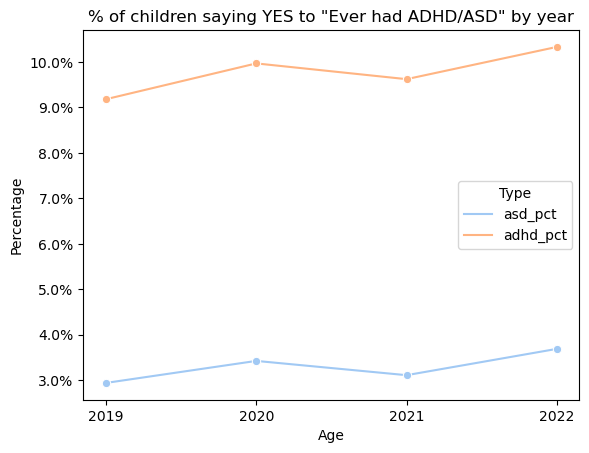

In [343]:
def percentage_formatter(x, pos):
    return f'{(x * 100):.1f}%'

melted_df = pd.melt(dfcall_yearly, id_vars=['year'], value_vars=['asd_pct', 'adhd_pct'], var_name='Type', value_name='Value')
ax = sns.lineplot(x='year', y='Value', hue='Type', data=melted_df, palette='pastel',marker='o')

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.title('% of children saying YES to "Ever had ADHD/ASD" by year')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.xticks(range(2019,2023,1))

plt.show()

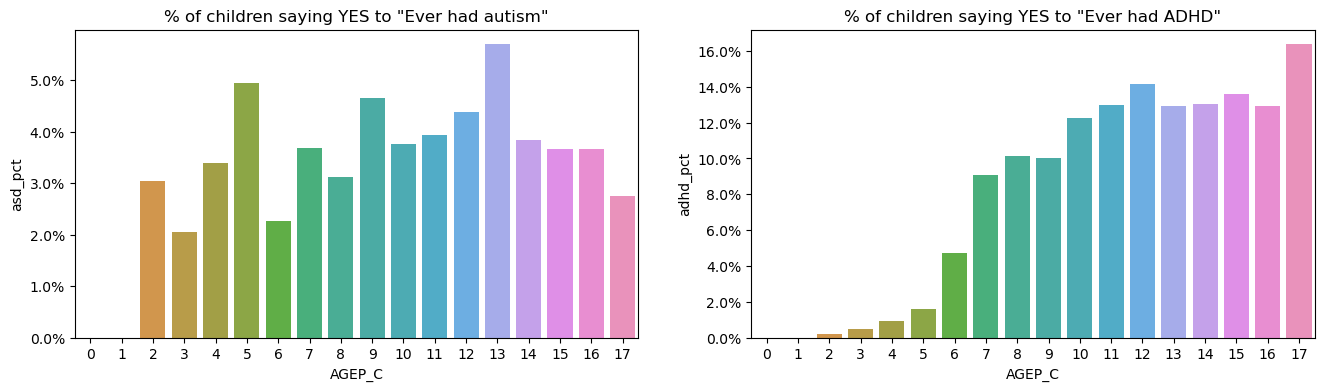

In [346]:
fig, axes = plt.subplots(1, 2, figsize = (16,4))

# Autistic percentage by age
dfc_asd_age = pd.DataFrame(dfcall.groupby('AGEP_C')['ASDEV_C'].apply(lambda x: (x==1.0).sum())).reset_index()
dfc_asd_age.rename({'ASDEV_C' : 'asd_count'},axis=1,inplace=True)
dfc_asd_age['all_count'] = dfcall.groupby('AGEP_C')['AGEP_C'].count()
dfc_asd_age['asd_pct'] = dfc_asd_age['asd_count'] / dfc22_asd_age['all_count']
sns.barplot(dfc22_asd_age,x='AGEP_C',y='asd_pct',ax=axes[0])
axes[0].yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
axes[0].set_title('% of children saying YES to "Ever had autism"')


# adhd percentage by age
dfc_adhd_age = pd.DataFrame(dfc21.groupby('AGEP_C')['ADHDEV_C'].apply(lambda x: (x==1.0).sum())).reset_index()
dfc_adhd_age.rename({'ADHDEV_C' : 'adhd_count'},axis=1,inplace=True)
dfc_adhd_age['all_count'] = dfc21.groupby('AGEP_C')['AGEP_C'].count()
dfc_adhd_age['adhd_pct'] = dfc_adhd_age['adhd_count'] / dfc_adhd_age['all_count']
sns.barplot(dfc_adhd_age,x='AGEP_C',y='adhd_pct',ax=axes[1])
axes[1].yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
axes[1].set_title('% of children saying YES to "Ever had ADHD"')


# Apply the formatter to the y-axis
#plt.xlabel('Age')
#plt.ylabel('Percentage')





plt.show()

## Correlation analysis (WIP)

In [347]:
dfcall_temp = dfcall.drop(columns=['HHX']).fillna(value=0)
dfcall_temp = dfcall_temp.loc[dfcall_temp['AGEP_C'] >= 3,:]
dfcall_corr = dfcall_temp.corrwith(dfcall_temp['ASDEV_C']).sort_values(ascending=False).reset_index()
dfcall_corr['Description'] = pd.merge(dfcall_corr, cookbook_child, left_on='index', right_on='Variable Name')['Description']
dfcall_corr

,index,0,Description
0,ASDEV_C,1.000000,Ever had autism
1,SCHSPEDEV_C,0.352878,Ever received special education
2,LDEV_C,0.328725,Ever had learning disability
3,DDEV_C,0.298967,Ever had developmental delay
4,ADHDEV_C,0.246817,Ever had ADD/ADHD
...,...,...,...
110,BSCFUSSY_C,NaN,Fussy or irritable
111,BSCSTHE_C,NaN,Hard to comfort
112,BSCSCHD_C,NaN,Hard to keep on schedule
113,BSCPTSLP_C,NaN,Hard to put to sleep


In [354]:
dfcall_temp = dfcall.drop(columns=['HHX']).fillna(value=0)
dfc_asd = dfcall[dfcall['ASDEV_C']==1.0].drop(columns=['HHX'])
dfc_non_asd = dfcall[dfcall['ASDEV_C']==0.0].drop(columns=['HHX'])
dfc_non_asd_sampled = dfc_non_asd.sample(n=dfc_asd.shape[0]) 
dfc_corr = pd.concat([dfc_asd,dfc_non_asd_sampled],axis=0)
#dfcall_temp = dfcall_temp.loc[dfcall_temp['AGEP_C'] >= 3,:]
dfc_corr2 = dfc_corr.corrwith(dfc_corr['ASDEV_C']).sort_values(ascending=False).reset_index()
dfc_corr2['Description'] = pd.merge(dfc_corr2, cookbook_child, left_on='index', right_on='Variable Name')['Description']
dfc_corr2

,index,0,Description
0,ASDEV_C,1.000000,Ever had autism
1,SCHSPEDEV_C,0.722897,Ever received special education
2,BEHDFCHG_C,0.598333,Difficulty with changes in routine
3,UNDRSTCHD_C,0.588967,Respondent's difficulty understanding child
4,SDQTOT_C,0.586836,SDQ total score
...,...,...,...
110,BSCFUSSY_C,NaN,Fussy or irritable
111,BSCSTHE_C,NaN,Hard to comfort
112,BSCSCHD_C,NaN,Hard to keep on schedule
113,BSCPTSLP_C,NaN,Hard to put to sleep


In [ ]:
from sklearn.metrics import matthews_corrcoef
dfctemp = dfcall.fillna(value=0)
dfctemp = dfctemp.drop(columns=['HHX'])
dfc_feature = dfctemp.drop(columns=['ASDEV_C'])
dfc_target = dfctemp[['ASDEV_C']]

mcc = matthews_corrcoef(dfc_target['ASDEV_C'],dfc_feature['UNDRSTIHH_C'] )
mcc


In [356]:
scaler = MinMaxScaler()
dfc_asd = dfcall[dfcall['ASDEV_C']==1.0].drop(columns=['HHX'])
dfc_asd_normalized = pd.DataFrame(scaler.fit_transform(dfc_asd), columns=dfc_asd.columns)
dfc_asd_normalized = dfc_asd_normalized.sum().sort_values(ascending=False) / dfc_asd_normalized.shape[0]
dfc_non_asd = dfcall[dfcall['ASDEV_C']==0.0].drop(columns=['HHX'])
dfc_non_asd_normalized = pd.DataFrame(scaler.fit_transform(dfc_non_asd), columns=dfc_non_asd.columns)
dfc_non_asd_normalized = dfc_non_asd_normalized.sum().sort_values(ascending=False) /dfc_non_asd_normalized.shape[0]
dfc_asd_pct = pd.concat([dfc_asd_normalized,dfc_non_asd_normalized],axis=1).reset_index()
dfc_asd_pct.rename({0:'asd_pct',1:'non_asd_pct'},axis=1,inplace=True)
dfc_asd_pct['diff'] = (dfc_asd_pct['asd_pct'] - dfc_asd_pct['non_asd_pct'])
dfc_asd_pct['Description'] = pd.merge(dfc_asd_pct, cookbook_child, left_on='index', right_on='Variable Name')['Description']

dfc_asd_pct.sort_values(by='diff',ascending=False)


C:\Users\hiron\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:479: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\hiron\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\hiron\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:479: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\hiron\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


,index,asd_pct,non_asd_pct,diff,Description
0,ASDNW_C,0.923596,0.000000,0.923596,Currently has autism
1,SCHSPEDEV_C,0.841573,0.126986,0.714587,Ever received special education
3,SCHSPED_C,0.726966,0.078794,0.648172,Currently receives special education
5,SCHSPEDEM_C,0.615730,0.041799,0.573931,Currently receives services for mental health
12,LDEV_C,0.483146,0.058443,0.424703,Ever had learning disability
...,...,...,...,...,...
33,SDQ4_C,0.311236,0.412260,-0.101024,Shares readily
57,SDQ21_C,0.182584,0.331612,-0.149028,Thinks things out before acting
10,PCNTADLT_C,0.524157,0.695201,-0.171044,"Number of adults in Sample Child family, top-c..."
56,SDQ25_C,0.190449,0.363690,-0.173240,Good attention span


In [357]:
scaler = MinMaxScaler()
dfc_asd = dfcall[dfcall['ADHDEV_C']==1.0].drop(columns=['HHX'])
dfc_asd_normalized = pd.DataFrame(scaler.fit_transform(dfc_asd), columns=dfc_asd.columns)
dfc_asd_normalized = dfc_asd_normalized.sum().sort_values(ascending=False) / dfc_asd_normalized.shape[0]
dfc_non_asd = dfcall[dfcall['ADHDEV_C']==0.0].drop(columns=['HHX'])
dfc_non_asd_normalized = pd.DataFrame(scaler.fit_transform(dfc_non_asd), columns=dfc_non_asd.columns)
dfc_non_asd_normalized = dfc_non_asd_normalized.sum().sort_values(ascending=False) /dfc_non_asd_normalized.shape[0]
dfc_asd_pct = pd.concat([dfc_asd_normalized,dfc_non_asd_normalized],axis=1).reset_index()
dfc_asd_pct.rename({0:'asd_pct',1:'non_asd_pct'},axis=1,inplace=True)
dfc_asd_pct['diff'] = (dfc_asd_pct['asd_pct'] - dfc_asd_pct['non_asd_pct'])
dfc_asd_pct['Description'] = pd.merge(dfc_asd_pct, cookbook_child, left_on='index', right_on='Variable Name')['Description']

dfc_asd_pct.sort_values(by='diff',ascending=False)


C:\Users\hiron\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:479: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\hiron\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\hiron\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:479: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\hiron\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


,index,asd_pct,non_asd_pct,diff,Description
0,ADHDNW_C,0.893032,0.000000,0.893032,Currently has ADD/ADHD
6,SCHSPEDEV_C,0.539360,0.108352,0.431008,Ever received special education
20,SCHSPED_C,0.416196,0.065823,0.350373,Currently receives special education
21,SDQIMP2_C,0.415443,0.096285,0.319157,Length of time with difficulties
28,SCHSPEDEM_C,0.332203,0.031329,0.300875,Currently receives services for mental health
...,...,...,...,...,...
26,PCNTKIDS_C,0.355179,0.412324,-0.057146,"Number of children in Sample Child family, top..."
35,SDQ21_C,0.242938,0.335849,-0.092912,Thinks things out before acting
7,ANXFREQ_C,0.527778,0.635795,-0.108017,"How often seems anxious, nervous, or worried"
43,SDQ25_C,0.206780,0.374523,-0.167744,Good attention span
